# Assignment No. - 4 : Simple Linear Regression

## **Q.1) Delivery_time -> Predict delivery time using sorting time**

Build a simple linear regression model by performing EDA 
and do necessary transformations and select the best model using  Python.

# Importing Libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
time_data = pd.read_csv('delivery_time.csv')
time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [3]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 21 entries, 0 to 20

Data columns (total 2 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Delivery Time  21 non-null     float64

 1   Sorting Time   21 non-null     int64  

dtypes: float64(1), int64(1)

memory usage: 464.0 bytes


In [4]:
time_data.shape    #To check shape of data

(21, 2)

 there are 21 rows and 2 columns in our data

In [5]:
time_data.dtypes   #to check type of data

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
corr_=time_data.corr()   
corr_                        #correlation Coefficient

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

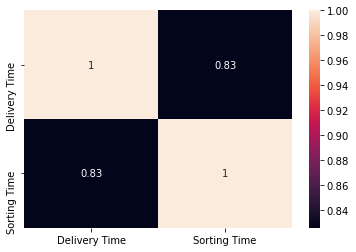

In [7]:
sns.heatmap(corr_,annot=True)

* **There is a positive correlation between Delivery Time and Sorting Time**

In [8]:
#describing our data
time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


* **The average Delivery Time and Sorting Time  is 16.79 and 6.19 respectively**

* **The minimum delivery time is 8.00 and maximum delivery time is 29.00**

* **The minimum sorting time is 2.00 and maximum sorting time is 10.00**


In [9]:
time_data.skew() , time_data.kurtosis()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

*  **From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric**

*  **From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.**

In [10]:
#finding null values
time_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

* **There are no null values in our data**

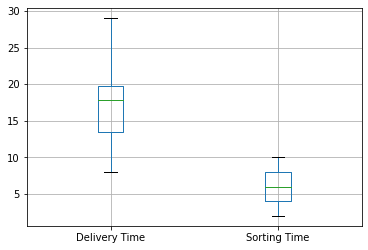

In [11]:
#boxplot
time_data.boxplot()
plt.show()

* **from above box plot  we can say that there are no outliers in our data**

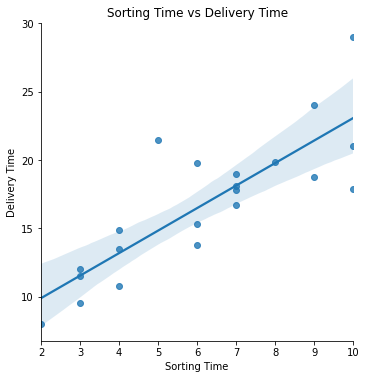

In [12]:
#to check linearity
sns.lmplot(x='Sorting Time',y='Delivery Time',data=time_data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

* **by observing above plot we can say that the linearity condition fails.**

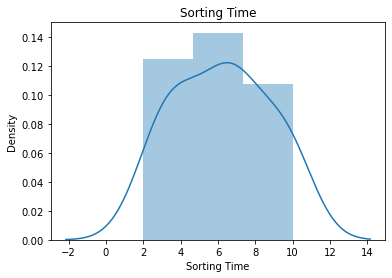

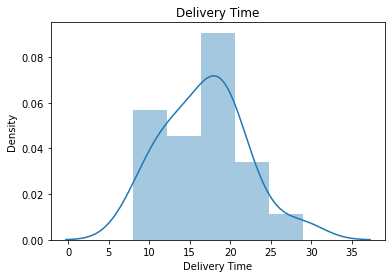

In [13]:
#checking Normality
sns.distplot(a=time_data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=time_data['Delivery Time'])
plt.title('Delivery Time')
plt.show()

* **From above plots we can say that,**
* **for Sorting Time most of the data lie within the group 2 - 10**
* **for Delivery Time most of the data lie within the group 10 - 20**

# Model Building and Model Training

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [15]:
time_data.columns=['Delivery','Sorting']       
time_data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
#fitting model
linear_model=smf.ols("Delivery~Sorting",data=time_data).fit()

In [17]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        23:14:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#parameters
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [19]:
#t-values and p-values
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349

Sorting      6.387447

dtype: float64 

 Intercept    0.001147

Sorting      0.000004

dtype: float64


In [20]:
#R squared values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# 

# By Using Log Transformation

In [21]:
time_data['log_sorting']=np.log(time_data['Sorting'])

In [22]:
time_data.head()

,Delivery,Sorting,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


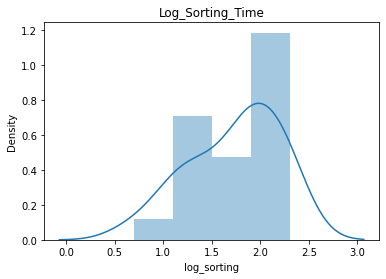

In [23]:
sns.distplot(time_data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

### Model Building by using Log transformation

In [24]:
#fitting model after transforming input variable
linear_model_1=smf.ols("Delivery~log_sorting",data=time_data).fit()

In [25]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        23:14:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#parameters
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [27]:
#t-values and p-values
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460

log_sorting    6.586789

dtype: float64 

 Intercept      0.641980

log_sorting    0.000003

dtype: float64


In [28]:
#R squared values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# 

### Model Selection

**After comparing the r-square values for both the models,
we can say that the linear_model_1 (Log Transformation Model) is good for our data because of high value of r-square.**

*  **Now , we can use our best model for further calculation**

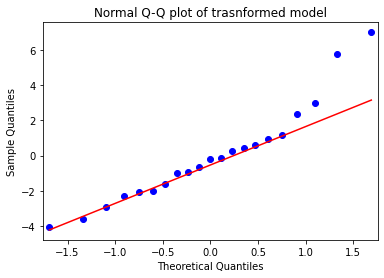

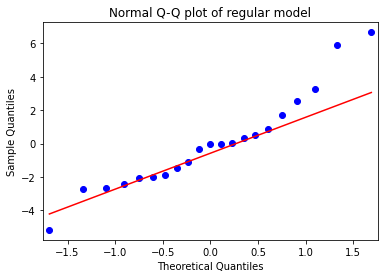

In [29]:
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

**By observing above two plots of transformed model and regular model,**

**we can say that for transformed model maximum points are lie on straight line,**

**hence our data follows normality condition.**

# 

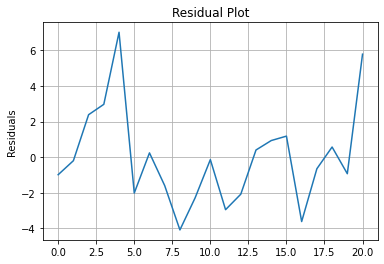

In [30]:
#Residual Plot of transformed  model
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [91]:
pred_y=linear_model_1.fittedvalues    #predicted values
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

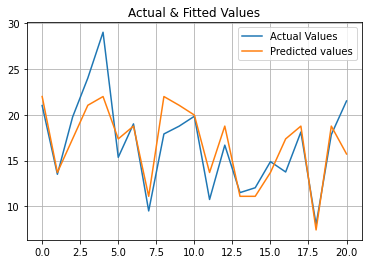

In [34]:
#plot for actual and fitted  values
plt.plot(time_data["Delivery"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

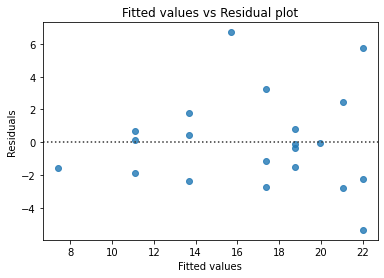

In [35]:
#Residual Vs Fitted Values Plot
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**This plot looks good in that the variance is roughly the same all the way across and
there are no worrisome patterns.there seems to be no difficulties with the model.**

# 

# ===========================================================

# ===========================================================

# 

## Q.2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA 
and do necessary transformations and select the best model using  Python.



# Importing Data

In [36]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA 
Initial Analysis

In [37]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 30 entries, 0 to 29

Data columns (total 2 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   YearsExperience  30 non-null     float64

 1   Salary           30 non-null     float64

dtypes: float64(2)

memory usage: 608.0 bytes


In [38]:
salary_data.shape

(30, 2)

In [39]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [40]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**there are no null values in our data**

In [41]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


* **average experience and average salary is 5.31 & 76003.00 respectively**
* **mininum experience is about 1.1 years and maximum experience is about 10.5 years**
* **mininum salary is 37731 and maximum salary is 122391**

In [42]:
cor = salary_data.corr() 
cor                            #Correlation Coefficient

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

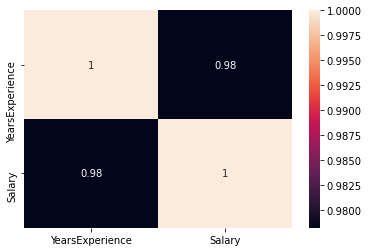

In [43]:
sns.heatmap(cor,annot=True)

**there is high positive correlation between experience and salary**

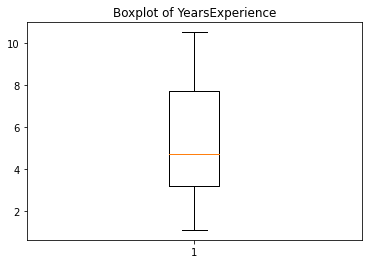

In [44]:
#boxplot
plt.boxplot(x='YearsExperience',data=salary_data)
plt.title("Boxplot of YearsExperience")
plt.show()


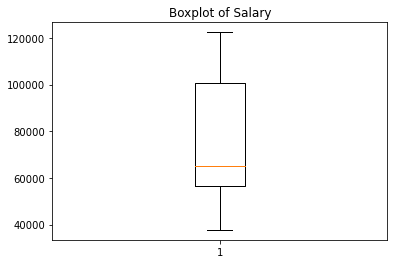

In [45]:
plt.boxplot(x='Salary',data=salary_data)
plt.title("Boxplot of Salary")
plt.show()

**there are no outliers in our data**

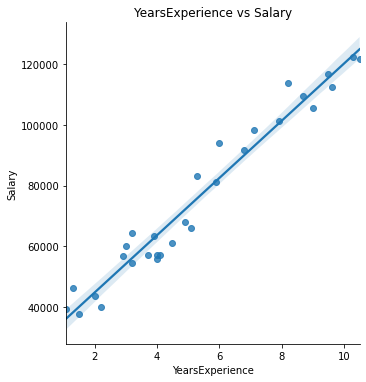

In [46]:
#linearity
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

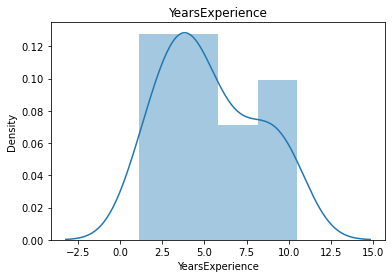

In [47]:
#Normality
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience')
plt.show()

**from above plot we can say that most of the data lie within group 2.5 - 7**

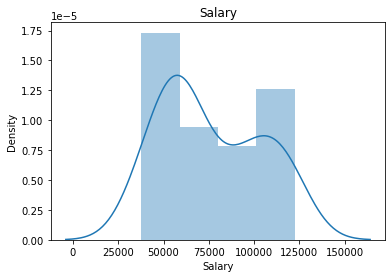

In [48]:
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

**from above plot we can say that most of the data lie within group 50k - 100k**

# Model Building || Model Training

In [49]:
salary_data=salary_data.rename(columns={"YearsExperience":"X",'Salary':'y'})
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
model = smf.ols('y~X',data=salary_data).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        23:15:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#parameters
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [53]:
#t-values and p-values
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940

X            24.950094

dtype: float64 

 Intercept    5.511950e-12

X            1.143068e-20

dtype: float64


In [54]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#### 
**since our r-square value is 0.957** 

**hence, higher r-squared indicates a better fit for the model.**


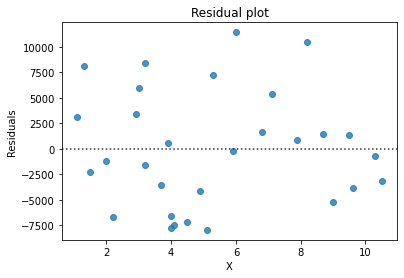

In [55]:
#Residual Plot
sns.residplot(x=salary_data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

By observing the above Residual Plot, we can say that the residual plot has **random pattern**, 
that indicating a good fit for a linear model.

# 

### Now we see that what r-square value and residual plot show us for transformed equations

# By Using Different Transformations

# 1) Log Tranformation

In [56]:
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [57]:
salary_data['log_x'] = np.log(salary_data['X'])

In [58]:
salary_data.head()

,X,y,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


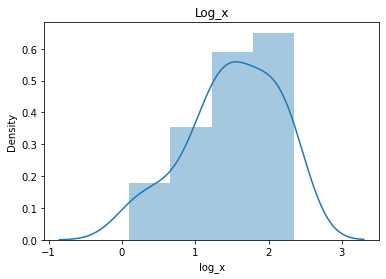

In [59]:
sns.distplot(salary_data['log_x'])
plt.title("Log_x")
plt.show()

### Model Building || Model Training

In [64]:
model_1 = smf.ols('y~log_x',data=salary_data).fit()

In [65]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        23:16:35   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model_1.rsquared

0.8538888828756969

This r-square value is less than the r-square of the model from raw data.

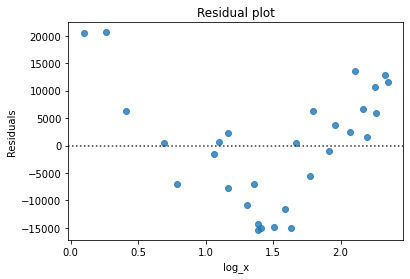

In [67]:
#Residual  Plot
sns.residplot(x=salary_data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show **U-shape**,which indicates our residual are **Non-random**.

# 

# Quadratic model (SQRT Transformation)

In [68]:
salary_data['sqrt_x'] = np.sqrt(salary_data['X'])

In [69]:
salary_data.head()

,X,y,log_x,sqrt_x
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


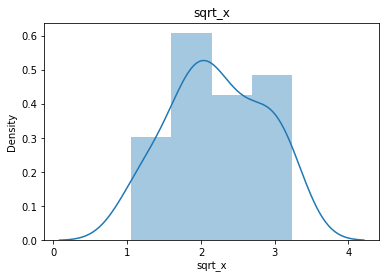

In [70]:
sns.distplot(salary_data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

### Model Building || Model Training

In [71]:
model_2 = smf.ols('y~sqrt_x',data=salary_data).fit()

In [72]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           8.57e-18
Time:                        23:16:47   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model_2.rsquared

0.9310009544993526

This r-square value is also less than the r-square of the model from raw data.

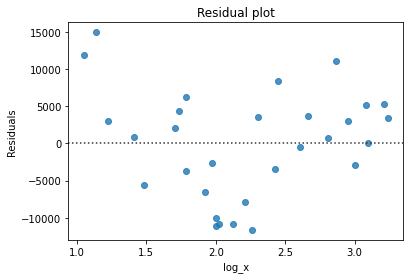

In [76]:
#Residual Plot
sns.residplot(x=salary_data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show **U-shape**,which indicates our residual are **Non-random**.

# 3) Reciprocal model (1/y) Transformation

**In this we are going to transform the dependent variable**

In [77]:
salary_data['res_proc_y']  = 1/salary_data['y']

In [78]:
salary_data.head()

,X,y,log_x,sqrt_x,res_proc_y
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


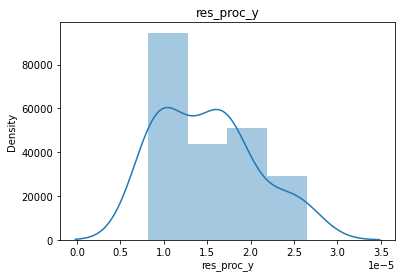

In [79]:
sns.distplot(salary_data['res_proc_y'])
plt.title("res_proc_y")
plt.show()

### Model Building || Model Training

In [80]:
model_3 = smf.ols('res_proc_y~X',data=salary_data).fit()

In [81]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             res_proc_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.63e-13
Time:                        23:17:59   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
X          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model_3.rsquared

0.8608672473082564

This r-square value is also less than the r-square of the model from raw data.

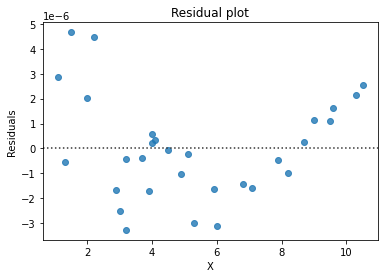

In [83]:
#Residual Plot
sns.residplot(x=salary_data['X'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

The above residual plot shows little bit **U-shape**,which indicates our residual are **Non-random**.

## Model Selection

Now by comparing r-square of all models,

we can say that the models which are fitted by using transformation 

are not so good as compare to our model from raw data(original data)

### Hence , we select our first model for further calculation

# 

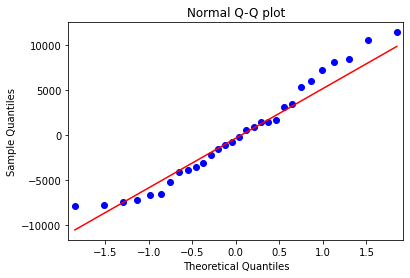

In [84]:
#Normal Q-Q Plot
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

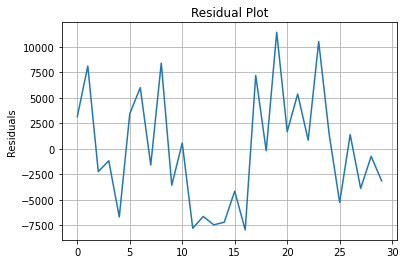

In [85]:
#Residual Plot
plt.plot(model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [86]:
#for prediction
test_data=salary_data['X']

In [87]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752

1    38077.151217

2    39967.143681

3    44692.124842

4    46582.117306

dtype: float64


In [88]:
actual = salary_data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

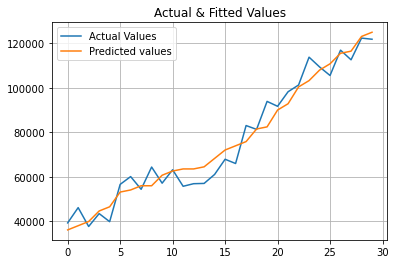

In [89]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

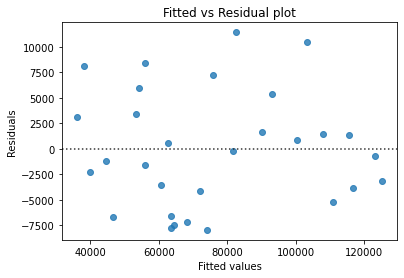

In [90]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

##### 
This plot looks good in that the variance is roughly the same all the way across and
there are no worrisome patterns.there seems to be no difficulties with the model.

# =============================================================